# Phase 01 -  EDA - Preparation
###  First we need to read and explore each dataset, find any "bad formatation" or null value.
    * PEA07-Estimated_Pupulation-1996-2017.csv

In [1]:
import pandas as pd
import numpy as np

#Datasets:
pea07="./Datasets/PEA07-Estimated_Pupulation-1996-2017.csv"
pea04 ="./Datasets/PEA04-Estimated_Pupulation-2011-2023.csv" 
cjq01 ="./Datasets/CJQ01-recorded_crime_2002-2023.csv"


# the fist dataset will be pea07
pea07=pd.read_csv(pea07)
pea07.head()


,Statistic,Age Group,Sex,Year,UNIT,State,Border,Midland,West,Dublin,Mid-East,Mid-West,South-East,South-West
0,Estimated Population (Persons in April),All ages,Both sexes,1996,Thousand,3626.1,407.3,205.5,352.4,1058.3,347.4,317.1,391.5,546.6
1,Estimated Population (Persons in April),All ages,Both sexes,1997,Thousand,3664.3,408.2,208.5,354.0,1072.2,361.2,317.8,393.3,549.1
2,Estimated Population (Persons in April),All ages,Both sexes,1998,Thousand,3703.1,410.6,211.0,355.8,1081.4,369.7,322.0,398.7,553.8
3,Estimated Population (Persons in April),All ages,Both sexes,1999,Thousand,3741.6,414.8,213.8,356.8,1086.1,379.3,326.1,404.5,560.3
4,Estimated Population (Persons in April),All ages,Both sexes,2000,Thousand,3789.5,420.5,216.4,362.6,1097.3,388.9,330.1,408.6,565.1


## Now we need to drop unicessary columns, and rename the other ones.
     To prevent any error if run this cell twice, we can create a function to rename columns.


In [2]:
# This funcion receive the variables: dataset, original column name and new column name.
# and try to rename the column, if the column doenst exist or it is alread renamed,  it will go to except.
def rename_col(df, old_col, new_col):
  try:
    df = df.rename(columns={old_col: new_col})
    return df
  except KeyError:
    print(f"Column {column} does not exist or has already been renamed.")
    pass

pea07 = rename_col(pea07, 'State', 'Total')

pea07.columns

Index(['Statistic', 'Age Group', 'Sex', 'Year', 'UNIT', 'Total', 'Border',
       'Midland', 'West', 'Dublin', 'Mid-East', 'Mid-West', 'South-East',
       'South-West'],
      dtype='object')

In [3]:
# Lets get the columns in the right local and right name.

pea07 = pea07.loc[:,['Year', 'Border',
       'Midland', 'West', 'Dublin', 'Mid-East', 'Mid-West', 'South-East',
       'South-West', 'Total', 'UNIT']]
pea07.head()

,Year,Border,Midland,West,Dublin,Mid-East,Mid-West,South-East,South-West,Total,UNIT
0,1996,407.3,205.5,352.4,1058.3,347.4,317.1,391.5,546.6,3626.1,Thousand
1,1997,408.2,208.5,354.0,1072.2,361.2,317.8,393.3,549.1,3664.3,Thousand
2,1998,410.6,211.0,355.8,1081.4,369.7,322.0,398.7,553.8,3703.1,Thousand
3,1999,414.8,213.8,356.8,1086.1,379.3,326.1,404.5,560.3,3741.6,Thousand
4,2000,420.5,216.4,362.6,1097.3,388.9,330.1,408.6,565.1,3789.5,Thousand


# Now Lets check if is there any null or bad variable.


In [4]:
print(pea07.info(), pea07.isnull().sum() )


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        22 non-null     int64  
 1   Border      22 non-null     float64
 2   Midland     22 non-null     float64
 3   West        22 non-null     float64
 4   Dublin      22 non-null     float64
 5   Mid-East    22 non-null     float64
 6   Mid-West    22 non-null     float64
 7   South-East  22 non-null     float64
 8   South-West  22 non-null     float64
 9   Total       22 non-null     float64
 10  UNIT        22 non-null     object 
dtypes: float64(9), int64(1), object(1)
memory usage: 2.0+ KB
None Year          0
Border        0
Midland       0
West          0
Dublin        0
Mid-East      0
Mid-West      0
South-East    0
South-West    0
Total         0
UNIT          0
dtype: int64



# Now We have organized and checkd the first file, lets do the same with the 2º File:
* PEA04-Estimated_Pupulation-2011-2023.csv

In [5]:

import pandas as pd
import numpy as np

pea04 = pd.read_csv(pea04)
print(pea04.head())



                                 STATISTIC  Year Age Group         Sex  \
0  Estimated Population (Persons in April)  2011  All ages  Both sexes   
1  Estimated Population (Persons in April)  2012  All ages  Both sexes   
2  Estimated Population (Persons in April)  2013  All ages  Both sexes   
3  Estimated Population (Persons in April)  2014  All ages  Both sexes   
4  Estimated Population (Persons in April)  2015  All ages  Both sexes   

       UNIT   State  Border   West  Mid-West  South-East  South-West  Dublin  \
0  Thousand  4574.9   391.9  440.8     466.8       410.3       662.3  1261.5   
1  Thousand  4593.7   392.1  439.4     470.6       411.6       667.4  1260.6   
2  Thousand  4614.7   393.1  441.7     470.7       413.7       673.8  1265.9   
3  Thousand  4645.4   392.0  441.1     471.8       413.5       679.5  1286.4   
4  Thousand  4687.8   391.9  442.2     473.4       415.6       678.9  1315.3   

   Mid-East  Midland  
0     657.4    283.8  
1     664.7    287.2  
2    

# To rename the column in this dataframe, we can use the first function We'd cerated for the first dataframe.
    Functions are part of "Functional Programing" and the advantage of functions is that we can make the code reusable, and we dont need to write the same code over and over again.

In [6]:
## Now we need to drop unicessary columns, and rename the other ones.
# To prevent any error if run this cell twice, we can create a function to rename columns.

pea04 = rename_col(pea04, 'State', 'Total')

pea04.columns

Index(['STATISTIC', 'Year', 'Age Group', 'Sex', 'UNIT', 'Total', 'Border',
       'West', 'Mid-West', 'South-East', 'South-West', 'Dublin', 'Mid-East',
       'Midland'],
      dtype='object')

In [7]:
# Lets get the columns in the right local and right name.

pea04 = pea04.loc[:,['Year', 'Border',
       'Midland', 'West', 'Dublin', 'Mid-East', 'Mid-West', 'South-East',
       'South-West', 'Total', 'UNIT']]
pea04.head()

,Year,Border,Midland,West,Dublin,Mid-East,Mid-West,South-East,South-West,Total,UNIT
0,2011,391.9,283.8,440.8,1261.5,657.4,466.8,410.3,662.3,4574.9,Thousand
1,2012,392.1,287.2,439.4,1260.6,664.7,470.6,411.6,667.4,4593.7,Thousand
2,2013,393.1,289.3,441.7,1265.9,666.4,470.7,413.7,673.8,4614.7,Thousand
3,2014,392.0,289.8,441.1,1286.4,671.4,471.8,413.5,679.5,4645.4,Thousand
4,2015,391.9,291.1,442.2,1315.3,679.3,473.4,415.6,678.9,4687.8,Thousand


##  As we know, the first dataset has  data from 1996 to 2017, we need to filter this dataframe,  get data from 2018 to 2023 and after all We will merge the dataframes into an one and We'll call "population_df"

In [8]:
# filter second dataset, to get values from 2018 to 2023
pea04 = pea04[(pea04['Year'] >= 2018)]
pea04



,Year,Border,Midland,West,Dublin,Mid-East,Mid-West,South-East,South-West,Total,UNIT
7,2018,405.7,304.7,458.7,1373.1,719.3,489.0,431.5,702.9,4884.9,Thousand
8,2019,409.9,309.0,464.8,1398.8,731.9,493.4,440.1,710.6,4958.5,Thousand
9,2020,412.0,309.9,472.2,1422.4,747.2,497.9,444.9,723.3,5029.9,Thousand
10,2021,417.1,314.2,475.4,1434.6,755.3,499.6,451.2,727.4,5074.7,Thousand
11,2022,422.2,320.3,486.7,1468.4,774.0,508.7,460.7,743.0,5184.0,Thousand
12,2023,432.1,324.6,500.8,1501.5,777.1,519.6,468.6,757.4,5281.6,Thousand


#  Merging process

    When we merge dataframes, pandas will create columns _x and _y, and fill the new rows with "NaN" (null) values.  
    
    To merge DataFrames properly, we need to perform the following tasks:
    * Merge datasets
    * Fill the NaN values in the _y columns with the respective value of _x
    * Drop the _x columns
   
     

In [9]:
# Merge the two DataFrames on the 'Year' column
population_df = pea07.merge(pea04, on='Year', how='outer')
population_df.tail()

,Year,Border_x,Midland_x,West_x,Dublin_x,Mid-East_x,Mid-West_x,South-East_x,South-West_x,Total_x,...,Border_y,Midland_y,West_y,Dublin_y,Mid-East_y,Mid-West_y,South-East_y,South-West_y,Total_y,UNIT_y
23,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,409.9,309.0,464.8,1398.8,731.9,493.4,440.1,710.6,4958.5,Thousand
24,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,412.0,309.9,472.2,1422.4,747.2,497.9,444.9,723.3,5029.9,Thousand
25,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,417.1,314.2,475.4,1434.6,755.3,499.6,451.2,727.4,5074.7,Thousand
26,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,422.2,320.3,486.7,1468.4,774.0,508.7,460.7,743.0,5184.0,Thousand
27,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,432.1,324.6,500.8,1501.5,777.1,519.6,468.6,757.4,5281.6,Thousand


### As you can see, we have columns _x and _y, now lets fill the NaN values

In [10]:
# Getting the collumns names
column_names = population_df.columns
column_names

Index(['Year', 'Border_x', 'Midland_x', 'West_x', 'Dublin_x', 'Mid-East_x',
       'Mid-West_x', 'South-East_x', 'South-West_x', 'Total_x', 'UNIT_x',
       'Border_y', 'Midland_y', 'West_y', 'Dublin_y', 'Mid-East_y',
       'Mid-West_y', 'South-East_y', 'South-West_y', 'Total_y', 'UNIT_y'],
      dtype='object')

In [12]:
# Filling the columns from the first dataset with the values of the second dataset.
# The loop for will check the name in each item of the list column_names and if the column name ends with _x, 
# it will fill with values of the same column ended in _y.

for column_name in population_df.columns:
    if column_name.endswith('_x'):
        population_df[column_name].fillna(population_df[column_name[:-2]+'_y'], inplace=True)
    
population_df.tail() 

,Year,Border_x,Midland_x,West_x,Dublin_x,Mid-East_x,Mid-West_x,South-East_x,South-West_x,Total_x,...,Border_y,Midland_y,West_y,Dublin_y,Mid-East_y,Mid-West_y,South-East_y,South-West_y,Total_y,UNIT_y
23,2019,409.9,309.0,464.8,1398.8,731.9,493.4,440.1,710.6,4958.5,...,409.9,309.0,464.8,1398.8,731.9,493.4,440.1,710.6,4958.5,Thousand
24,2020,412.0,309.9,472.2,1422.4,747.2,497.9,444.9,723.3,5029.9,...,412.0,309.9,472.2,1422.4,747.2,497.9,444.9,723.3,5029.9,Thousand
25,2021,417.1,314.2,475.4,1434.6,755.3,499.6,451.2,727.4,5074.7,...,417.1,314.2,475.4,1434.6,755.3,499.6,451.2,727.4,5074.7,Thousand
26,2022,422.2,320.3,486.7,1468.4,774.0,508.7,460.7,743.0,5184.0,...,422.2,320.3,486.7,1468.4,774.0,508.7,460.7,743.0,5184.0,Thousand
27,2023,432.1,324.6,500.8,1501.5,777.1,519.6,468.6,757.4,5281.6,...,432.1,324.6,500.8,1501.5,777.1,519.6,468.6,757.4,5281.6,Thousand


In [13]:
#function to rename the columns merged,  remove the '_x' at the end.

# function rename_columns  will check into columns list, and each column ended in _x, the _x (-2 letters) will be removed.

def rename_columns(df):

  # Create a list of the new column names.
  new_column_names = []
  for column_name in population_df.columns:
    if column_name.endswith('_x'):
      new_column_name = column_name[:-2]
    else:
      new_column_name = column_name

    new_column_names.append(new_column_name)

  # Rename the columns of the DataFrame.
  population_df.columns = new_column_names

  return df

# Rename the columns of the DataFrame.
population_df = rename_columns(population_df)


# Getting only the necesary columns:




population_df.head()





,Year,Border,Midland,West,Dublin,Mid-East,Mid-West,South-East,South-West,Total,...,Border_y,Midland_y,West_y,Dublin_y,Mid-East_y,Mid-West_y,South-East_y,South-West_y,Total_y,UNIT_y
0,1996,407.3,205.5,352.4,1058.3,347.4,317.1,391.5,546.6,3626.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997,408.2,208.5,354.0,1072.2,361.2,317.8,393.3,549.1,3664.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1998,410.6,211.0,355.8,1081.4,369.7,322.0,398.7,553.8,3703.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999,414.8,213.8,356.8,1086.1,379.3,326.1,404.5,560.3,3741.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,420.5,216.4,362.6,1097.3,388.9,330.1,408.6,565.1,3789.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# This for loop will drop every column ended with _y 
for col in population_df.columns:
    if col.endswith("_y"):
        population_df.drop(col, axis=1, inplace=True)

population_df

,Year,Border,Midland,West,Dublin,Mid-East,Mid-West,South-East,South-West,Total,UNIT
0,1996,407.3,205.5,352.4,1058.3,347.4,317.1,391.5,546.6,3626.1,Thousand
1,1997,408.2,208.5,354.0,1072.2,361.2,317.8,393.3,549.1,3664.3,Thousand
2,1998,410.6,211.0,355.8,1081.4,369.7,322.0,398.7,553.8,3703.1,Thousand
3,1999,414.8,213.8,356.8,1086.1,379.3,326.1,404.5,560.3,3741.6,Thousand
4,2000,420.5,216.4,362.6,1097.3,388.9,330.1,408.6,565.1,3789.5,Thousand
5,2001,425.0,220.5,368.6,1108.2,401.2,335.3,416.5,572.2,3847.2,Thousand
6,2002,432.5,225.4,380.3,1122.8,412.6,339.6,423.6,580.4,3917.2,Thousand
7,2003,439.6,230.4,389.1,1133.2,426.5,342.4,430.4,588.4,3979.9,Thousand
8,2004,449.8,236.4,394.1,1144.8,440.0,345.6,438.0,596.4,4045.2,Thousand
9,2005,457.5,241.9,405.6,1160.6,456.9,353.1,449.0,609.2,4133.8,Thousand


In [16]:
# Checking if is there any null variable or misformated.
print(population_df.isnull().sum())
print(population_df.info())

Year          0
Border        0
Midland       0
West          0
Dublin        0
Mid-East      0
Mid-West      0
South-East    0
South-West    0
Total         0
UNIT          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        28 non-null     int64  
 1   Border      28 non-null     float64
 2   Midland     28 non-null     float64
 3   West        28 non-null     float64
 4   Dublin      28 non-null     float64
 5   Mid-East    28 non-null     float64
 6   Mid-West    28 non-null     float64
 7   South-East  28 non-null     float64
 8   South-West  28 non-null     float64
 9   Total       28 non-null     float64
 10  UNIT        28 non-null     object 
dtypes: float64(9), int64(1), object(1)
memory usage: 2.5+ KB
None


#  Phase 2 - EDA - Visualization
    Now that we have all data organized and clean, we can perform some Visualizations and Plots
    
 

One of the most obvious insights is the overall growth of Ireland's population over time
The chart would also show the regional variation in population growth. Some regions, such as Dublin and the surrounding counties, have experienced more rapid growth than others. This is due to a number of factors, including economic opportunity and migration.

Finally, the chart can provide insights into the future of Ireland's population. By analyzing the trends in population growth, demographers can make predictions about the future size and distribution of the population

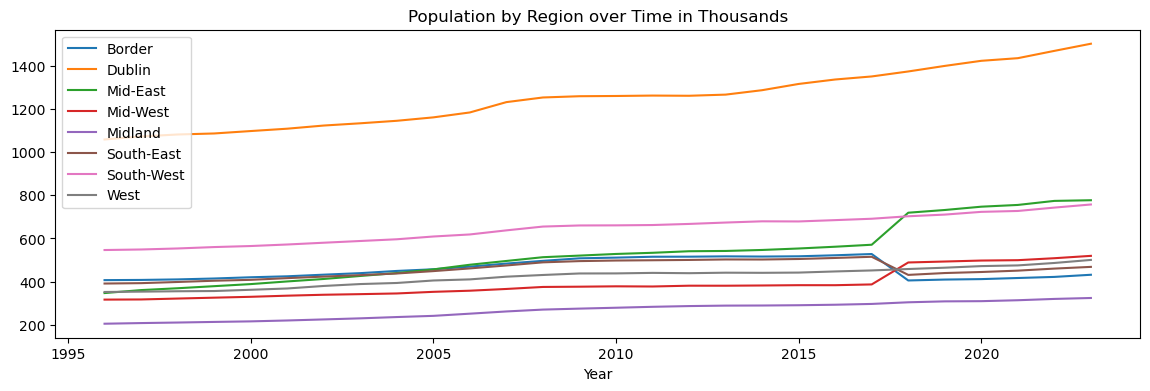

In [18]:

import matplotlib.pyplot as plt

# Resize the chart to be wider
fig, ax = plt.subplots(figsize=(14, 4))

# Here I will plot a line chart of the population growth for each `Region`
population_df.plot(kind='line', x='Year', y=['Border', 'Dublin', 'Mid-East', 'Mid-West', 'Midland', 'South-East', 'South-West',  'West'], ax=ax)

ax.set_title('Population by Region over Time in Thousands')
plt.show()

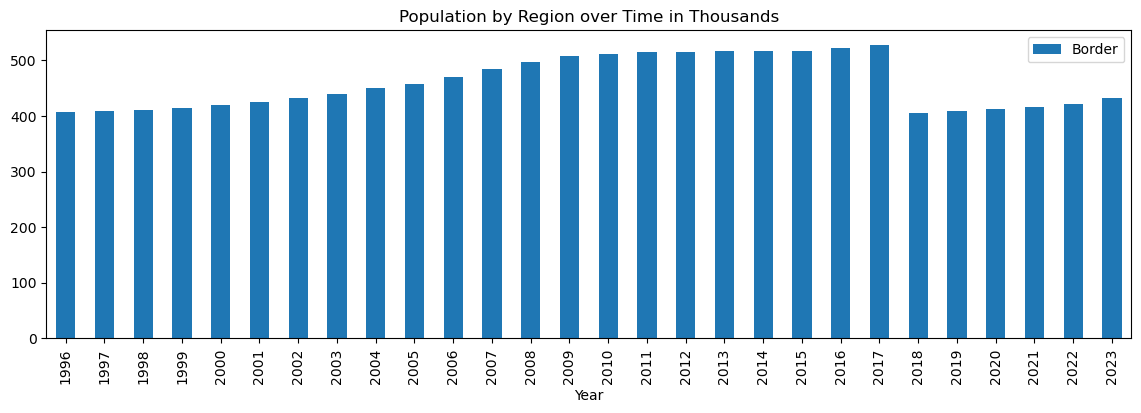

In [17]:
import matplotlib.pyplot as plt
# Resize the chart to be longer
fig, ax = plt.subplots(figsize=(14, 4))

# Plot a line chart of the `VALUE` column for each `Region`
df.plot(kind='bar', x='Year', y=['Border'], ax=ax)

# Set the title of the chart
ax.set_title('Population by Region over Time in Thousands')

# Show the chart
plt.show()

# Pie Chart
    Pie chart need a 1D array as input. so we need to convert the data variable to a 1D array. 
    Using numpy.ravel() function we can flattens a NumPy array into a 1D array.

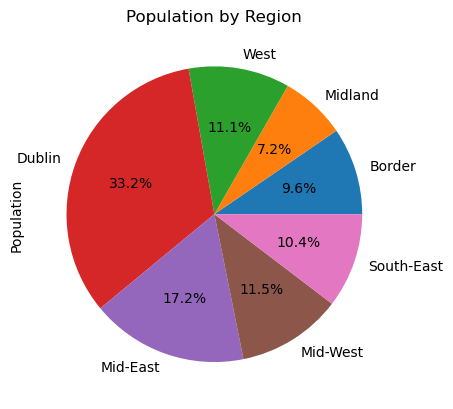

In [21]:
# Get the data from the table
df_2023 = df[df['Year'].values == 2023]
df_2023= df_2023.iloc[:,1:8]
data = df_2023.values

# Flatten the data array into a 1D array
data_1d = np.ravel(data)

# Plot the pie chart
plt.pie(data_1d, labels=["Border", "Midland", "West", "Dublin", "Mid-East", "Mid-West", "South-East"], autopct="%1.1f%%")

# Set the title and label for the chart
plt.title("Population by Region")
plt.ylabel("Population")

# Show the chart
plt.show()